Universidade Estadual de Campinas (UNICAMP), Instituto de Computação (IC)

Prof. Jacques Wainer, 2021s1

In [ ]:
# RA & Name
print('264965: ' + 'Décio Luiz Gazzoni Filho')
print('265673: ' + 'Gabriel Luciano Gomes')
print('192880: ' + 'Lucas Borges Rondon')

264965: Décio Luiz Gazzoni Filho
265673: Gabriel Luciano Gomes
192880: Lucas Borges Rondon


# Metodologia

Para este projeto, foi utilizado o scikit-learn e Statsmodels para explorar os modelos de regressores e classificadores e o Keras (TensorFlow) para o modelo de rede neural recorrente. As seções abaixo descreverão todo o processo realizado neste trabalho.

## Leitura e Pré-processamento

Os dados foram adquiridos por meio de um link divulgado pelo professor, que correspondem em um conjunto de 1096 amostras, com dois atributos (data e preço), que são o preço do ouro e a data, a cada semana, desde 18/06/2000. Como estamos interessados apenas no valor do ouro, a coluna de data foi descartada. 

Foi tentado realizar um experimento de consideração de porcentagens (razões) entre os valores da semana corrente e a anterior. Entretanto, nenhum resultado favorável foi atingido. Dessa forma, os dados foram utilizados sem nenhum tipo de pré-processamento.





## Janela deslizante

Como neste projeto é explorado aspectos de séries temporais, o conjunto de dados adotou uma técnica chamada "Janela Deslizante". Esta técnica é responsável por separar instâncias do conjunto para formar uma sequência que possibilita e facilita a regressão/classificação dos dados. 

Todos os modelos utilizados apresentados neste trabalho exploram a ideia de janela deslizante, exceto os modelos de RNN e o ARIMA. Isto porque eles exploram conceitos diferentes para tratar essa técnica, como o lookback (nas RNNs) e memória implícita (ARIMA).

## Otimização de Hiperparâmetros

Como diversos dos modelos explorados utilizam hiperparâmetros, foi necessário utilizar algum algoritmo de busca para identificar os melhores valores destes hiperparâmetros. Para isso, foi utilizado a biblioteca 'hyperopt', que consiste em uma otimização Bayesiana. Além das configurações de cada modelo, o tamanho da janela também foi explorada neste otimizador a fim de obter o melhor resultado possível dos modelos.

# Benchmarks

Como os preços do ouro no mercado é compreendido como um *random walk*, o  modelo de persistência para regressão prediz que o preço corrente é o mesmo que o da semana anterior. Esse é o modelo a ser superado. 

Para a classificação de um *random walk*, com média zero, ambas os resultados (subir ou descer) são equiprováveis e, portanto, não haveria uma melhor estratégia a ser adotada. Porém, observa-se um 'vies' de subida dos preços, ao longo do tempo, provavelmente podendo ser atribuído à inflação. Neste caso, a probabilidade de subida é maior do que a de descida e a melhor previsão é que o preço sempre sobe. 

## Modelos de Regressão e Classificação Utilizados

Para realizar o estudo, os seguintes modelos foram explorados:

- Regressão
 - SVM
 - Ridge
 - Lasso
 - GBM
 - Random Forest
 - Decision Tree
 - ARIMA
 - LSTM
 - SimpleRNN
 - MLP

- Classificação
 - SVM
 - Ridge
 - GBM
 - Random Forest
 - Decision Tree
 - ARIMA
 - MLP


Além do uso da classificação direta, foi explorado o uso de regressores como classificadores indiretos. Isto para testar a hipótese não só de que um regressor pode apresentar melhor resultado para classificação, mas também porque existem modelos que não possuem a classificação, como ARIMA e Lasso. Sendo eles:
 - SVM
 - Ridge
 - Lasso
 - GBM
 - Random Forest
 - Decision Tree
 - ARIMA





# Resultados

 ## Treino

 

### Regressão

In [8]:
import pandas as pd

pd.set_option('display.max_colwidth', 0)
df = pd.read_csv('/content/drive/Shareddrives/MO432/regressao_2.csv')
df

,name,params,score,default
0,Previous Times Constant,{'k': 1.0003},29.4873,False
1,Previous Times Constant,NaN,29.4907,True
2,ARIMA,"{'d': 1, 'p': 0, 'q': 0, 'window_size': 10}",29.5094,False
3,ARIMA,NaN,29.5094,True
4,Lasso L1,"{'alpha': 108.8124, 'window_size': 1}",29.6074,False
5,Ridge L2,"{'alpha': 999.9760, 'window_size': 1}",29.6157,False
6,Lasso L1,NaN,29.6158,True
7,Ridge L2,NaN,29.6159,True
8,MLP,NaN,29.7613,True
9,MLP,"{'hidden_layer_sizes': 17, 'window_size': 1}",35.3532,False


### Classificação com Regressores

In [10]:
df = pd.read_csv('/content/drive/Shareddrives/MO432/classificacao_usando_regressao_2.csv')
df

,name,params,score,default
0,ArimaRegressor,"{'d': 0, 'p': 2, 'q': 0, 'window_size': 10}",0.536,False
1,MLP,NaN,0.526,True
2,Lasso L1,"{'alpha': 0.0660, 'window_size': 2}",0.520,False
3,SVM com RBF,"{'C': 2362.0528, 'epsilon': 0.02995, 'gamma': 0.0027, 'window_size': 2}",0.516,False
4,ArimaRegressor,NaN,0.516,True
5,Ridge L2,"{'alpha': 0.0070, 'window_size': 2}",0.514,False
6,Ridge L2,NaN,0.514,True
7,Lasso L1,NaN,0.514,True
8,MLP,"{'hidden_layer_sizes': 18, 'window_size': 4}",0.508,False
9,GBM,"{'max_depth': 4, 'n_estimators': 100, 'window_size': 1}",0.506,False


### Classificação Direta

In [9]:
df = pd.read_csv('/content/drive/Shareddrives/MO432/classificacao_2.csv')
df

,name,params,score,default
0,SVC com RBF,"{'C': 12.1897, 'gamma': 0.6141, 'window_size': 1}",0.560,False
1,Ridge L2,"{'alpha': 1.5256, 'window_size': 7}",0.532,False
2,Ridge L2,NaN,0.532,True
3,Always 1,NaN,0.528,False
4,Always 1,NaN,0.528,True
5,Decision Tree,"{'max_depth': 2, 'window_size': 1}",0.528,False
6,MLP,"{'hidden_layer_sizes': 20, 'window_size': 2}",0.520,False
7,MLP,NaN,0.514,True
8,SVC com RBF,NaN,0.510,True
9,GBM,"{'max_depth': 4, 'n_estimators': 10, 'window_size': 3}",0.506,False


### Análise dos resultados


No caso da regressão, não foi possível encontrar um resultado melhor do que aquele que repete o preço da semana anterior, com pequeno acrescimo em função do pequeno viés de subida dos dados. A classificação com regressão, também não obteve bons resultados, se comparado à classificação direta. Por sua vez, o único resultado considerável na classificação direta, foi utilizando o modelo SVC, com acurácia de **56%**, significativamente superior à previsão de subida contínua (Always 1), com **52,8%**.

## Teste

### Regressão

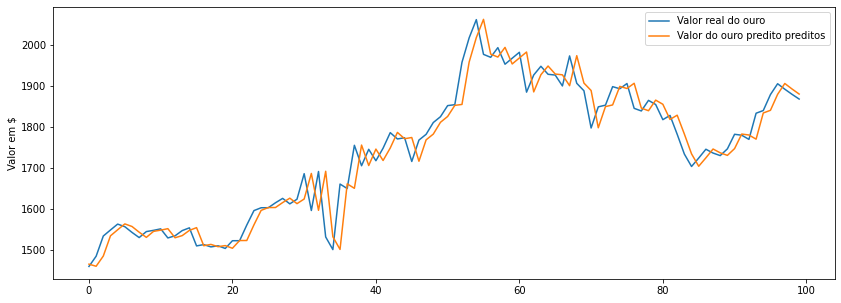

In [14]:
import matplotlib.pyplot as plt

df_regressao = pd.read_csv('/content/drive/Shareddrives/MO432/pred_regressao.csv')

plt.figure(figsize=(14,5))
plt.plot(df_regressao['x_test'], label = 'Valor real do ouro')
plt.plot(df_regressao['y_pred'], label = 'Valor do ouro predito preditos')
plt.ylabel('Valor em $')
plt.legend()
plt.show()



RMSE de 43.846886993100505 para o conjunto de teste.

### Classificação

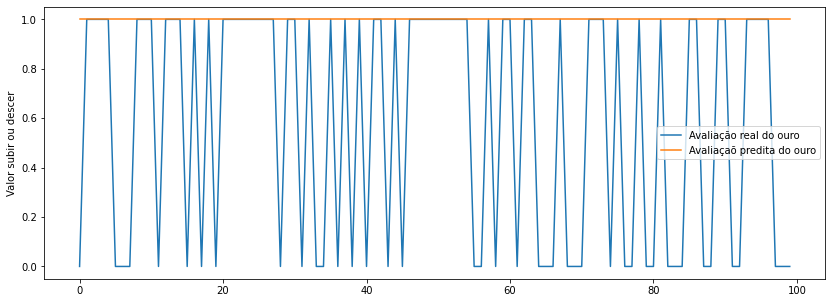

In [15]:
import matplotlib.pyplot as plt

df_class = pd.read_csv('/content/drive/Shareddrives/MO432/pred_classificacao.csv')

plt.figure(figsize=(14,5))
plt.plot(df_class['y_test'], label = 'Avaliação real do ouro')
plt.plot(df_class['y_pred'], label = 'Avaliaçaõ predita do ouro')
plt.ylabel('Valor subir ou descer')
plt.legend()
plt.show()


Acurácia de 0.58 para a base de teste

Como discutido anteriormente, o melhor regressor apenas prevê na semana corrente o mesmo preço da semana anterior, com uma pequena correção multiplicativa. Já o classificador SVC, ao analisar sua saída, constatou-se que este previu que os preços sempre subiriam. Portanto, apenas de todos os esforços de todos os diferentes regressores e classificadores, confirmou-se o esperado para um processo do tipo *random walk*, que não é possível fazer uma previsão/classificação ingênua. 